# Dataset 2 - data_1 + data_2 Dataset

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset into memory
df = pd.read_csv('data_1.csv', header=0)
#Dropping rows with null values
df = df.dropna()

In [3]:
#Load the dataset into memory
df_2 = pd.read_csv('data_2.csv', header=0)
#Dropping rows with null values
df_2 = df_2.dropna()

In [4]:
#display first 5 records 
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,150,0.000,0.000,0.001,0.000,0.0,0.0,81,0.4,17,...,130,174,2,0,152,150,151,1,0,3
1446,150,0.000,0.003,0.000,0.000,0.0,0.0,80,0.4,24,...,124,176,1,0,150,152,153,2,0,3
1447,150,0.000,0.001,0.000,0.000,0.0,0.0,84,0.3,32,...,136,156,0,0,150,150,151,1,1,3
1448,150,0.000,0.002,0.000,0.000,0.0,0.0,84,0.3,37,...,140,156,0,0,150,150,151,0,0,3


In [5]:
df['fetal_health'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
df_2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.000,0.000,0.003,0.003,0.0,0.000,34,1.0,7,...,83,149,7,1,136,133,137,7,1,1
1,132,0.000,0.000,0.004,0.007,0.0,0.000,35,1.2,10,...,71,143,7,1,136,131,136,11,1,1
2,132,0.001,0.000,0.004,0.004,0.0,0.000,28,1.6,4,...,56,153,9,3,136,130,135,25,1,1
3,132,0.000,0.000,0.003,0.000,0.0,0.000,30,1.1,0,...,97,149,4,1,133,133,135,3,1,1
4,132,0.001,0.000,0.005,0.004,0.0,0.000,25,1.9,0,...,54,153,6,0,133,127,133,34,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,128,0.000,0.002,0.007,0.005,0.0,0.002,65,2.6,0,...,63,192,6,0,103,92,114,28,0,3
672,128,0.000,0.002,0.007,0.005,0.0,0.002,66,2.7,0,...,63,192,4,0,105,89,112,21,0,3
673,128,0.000,0.002,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,6,0,104,94,115,28,0,3
674,128,0.000,0.003,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,5,0,114,97,116,25,0,3


In [7]:
df = df.append(df_2)
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.000,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,128,0.000,0.002,0.007,0.005,0.0,0.002,65,2.6,0,...,63,192,6,0,103,92,114,28,0,3
672,128,0.000,0.002,0.007,0.005,0.0,0.002,66,2.7,0,...,63,192,4,0,105,89,112,21,0,3
673,128,0.000,0.002,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,6,0,104,94,115,28,0,3
674,128,0.000,0.003,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,5,0,114,97,116,25,0,3


In [8]:
df.reset_index(drop = True, inplace = True)
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.000,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,128,0.000,0.002,0.007,0.005,0.0,0.002,65,2.6,0,...,63,192,6,0,103,92,114,28,0,3
2122,128,0.000,0.002,0.007,0.005,0.0,0.002,66,2.7,0,...,63,192,4,0,105,89,112,21,0,3
2123,128,0.000,0.002,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,6,0,104,94,115,28,0,3
2124,128,0.000,0.003,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,5,0,114,97,116,25,0,3


In [9]:
df.shape

(2126, 22)

In [10]:
df.dtypes 

baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_

In [11]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# Preprocessing Continuous variables

# Preprocessing baseline value column

In [12]:
#Display total null values
print('Total Null Values in baseline value column:')
print(df['baseline value'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for baseline value column:')
print(df['baseline value'].min(), df['baseline value'].max())

Total Null Values in baseline value column:
0

Minimum and Maximum values for baseline value column:
106 160


In [13]:
df['baseline value'].sum()

283404

In [14]:
df['baseline value'].value_counts()

133    136
130    111
122    109
138    103
125     91
128     85
120     78
144     77
142     77
132     76
136     72
140     70
134     67
135     65
146     62
127     60
137     59
129     57
123     56
131     56
143     56
148     52
121     44
139     39
141     39
126     38
145     37
115     28
150     26
110     21
149     18
152     17
119     17
112     16
147     14
151     14
159     12
114     11
158     10
124     10
118      9
154      8
106      7
116      5
157      4
156      4
117      2
160      1
Name: baseline value, dtype: int64

In [15]:
#Discretizing the baseline value column
cut_label_baseline_value_bin = ['1', '2', '3', '4', '5','6','7','8','9','10','11']

cut_bins = [105, 120, 122, 125, 128, 130, 132, 134, 136, 140, 145, 160]

df['baseline value_bin'] = pd.cut(df['baseline value'], bins=cut_bins, labels=cut_label_baseline_value_bin)

# Finding counts of unique values
df['baseline value_bin'].value_counts()


10    286
9     271
11    242
7     203
1     194
4     183
5     168
3     157
2     153
8     137
6     132
Name: baseline value_bin, dtype: int64

# Preprocessing accelerations column

In [16]:
#Display total null values
print('Total Null Values in accelerations column:')
print(df['accelerations'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for accelerations column:')
print(df['accelerations'].min(), df['accelerations'].max())

Total Null Values in accelerations column:
0

Minimum and Maximum values for accelerations column:
0.0 0.019


In [17]:
# Finding counts of unique values
df['accelerations'].value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [18]:
#Discretizing the accelerations column
cut_label_accelerations = ['1', '2', '3', '4', '5', '6', '7','8','9']

cut_bins = [-1, 0.000, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.010, 0.019]

df['accelerations_bin'] = pd.cut(df['accelerations'], bins=cut_bins, labels=cut_label_accelerations)

df['accelerations_bin'].value_counts()



1    894
2    303
7    194
3    161
9    125
4    117
6    112
8    110
5    110
Name: accelerations_bin, dtype: int64

# Preprocessing fetal_movement column

In [19]:
#Display total null values
print('Total Null Values in fetal_movement column:')
print(df['fetal_movement'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for fetal_movement column:')
print(df['fetal_movement'].min(), df['fetal_movement'].max())

Total Null Values in fetal_movement column:
0

Minimum and Maximum values for fetal_movement column:
0.0 0.48100000000000004


In [20]:
# Finding counts of unique values

df['fetal_movement'].value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.092       1
0.383       1
0.051       1
0.037       1
0.306       1
Name: fetal_movement, Length: 102, dtype: int64

In [21]:
#Discretizing the fetal_movement column
cut_label_fetal_movement = ['1', '2', '3', '4', '5']

cut_bins = [-1,0.000,0.002,0.005,0.025, 0.482]

df['fetal_movement_bin'] = pd.cut(df['fetal_movement'], bins=cut_bins, labels=cut_label_fetal_movement)

# Finding counts of unique values
df['fetal_movement_bin'].value_counts()



1    1311
2     276
4     251
3     173
5     115
Name: fetal_movement_bin, dtype: int64

# Preprocessing uterine_contractions column

In [22]:
#Display total null values
print('Total Null Values in uterine_contractions column:')
print(df['uterine_contractions'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for uterine_contractions column:')
print(df['uterine_contractions'].min(), df['uterine_contractions'].max())

Total Null Values in uterine_contractions column:
0

Minimum and Maximum values for uterine_contractions column:
0.0 0.015


In [23]:
# Finding counts of unique values
df['uterine_contractions'].value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.002    160
0.008    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [24]:
#Discretizing the uterine_contractions column
cut_label_uterine_contractions = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

cut_bins = [-1, 0.000, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.015]

df['uterine_contractions_bin'] = pd.cut(df['uterine_contractions'], bins=cut_bins, labels=cut_label_uterine_contractions)

# Finding counts of unique values
df['uterine_contractions_bin'].value_counts()

1    332
5    290
2    278
4    244
6    231
7    216
3    212
9    163
8    160
Name: uterine_contractions_bin, dtype: int64

# Preprocessing light_decelerations column

In [25]:
#Display total null values
print('Total Null Values in light_decelerations column:')
print(df['light_decelerations'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for light_decelerations column:')
print(df['light_decelerations'].min(), df['light_decelerations'].max())

Total Null Values in light_decelerations column:
0

Minimum and Maximum values for light_decelerations column:
0.0 0.015


In [26]:
# Finding counts of unique values
df['light_decelerations'].value_counts()

0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: light_decelerations, dtype: int64

In [27]:
#Discretizing the light_decelerations column
cut_label_light_decelerations = ['1', '2', '3', '4', '5', '6']

cut_bins = [-1, 0.000, 0.002, 0.003, 0.004, 0.005, 0.015]

df['light_decelerations_bin'] = pd.cut(df['light_decelerations'], bins=cut_bins, labels=cut_label_light_decelerations)

# Finding counts of unique values
df['light_decelerations_bin'].value_counts()

1    1231
6     278
2     278
3     118
4     114
5     107
Name: light_decelerations_bin, dtype: int64

# Preprocessing severe_decelerations column

In [28]:
#Display total null values
print('Total Null Values in severe_decelerations column:')
print(df['severe_decelerations'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for severe_decelerations column:')
print(df['severe_decelerations'].min(), df['severe_decelerations'].max())

Total Null Values in severe_decelerations column:
0

Minimum and Maximum values for severe_decelerations column:
0.0 0.001


In [29]:
# Finding counts of unique values
df['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

In [30]:
#Discretizing the severe_decelerations column
cut_label_severe_decelerations = ['1', '2']

cut_bins = [-1, 0.0005, 0.001]

df['severe_decelerations_bin'] = pd.cut(df['severe_decelerations'], bins=cut_bins, labels=cut_label_severe_decelerations)

# Finding counts of unique values
df['severe_decelerations_bin'].value_counts()

1    2119
2       7
Name: severe_decelerations_bin, dtype: int64

# Preprocessing prolongued_decelerations column

In [31]:
#Display total null values
print('Total Null Values in prolongued_decelerations column:')
print(df['prolongued_decelerations'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for prolongued_decelerations column:')
print(df['prolongued_decelerations'].min(), df['prolongued_decelerations'].max())

Total Null Values in prolongued_decelerations column:
0

Minimum and Maximum values for prolongued_decelerations column:
0.0 0.005


In [32]:
# Finding counts of unique values
df['prolongued_decelerations'].value_counts()

0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: prolongued_decelerations, dtype: int64

In [33]:
#Discretizing the prolongued_decelerations column
cut_label_prolongued_decelerations = ['1', '2']

cut_bins = [-1, 0.0001, 0.005]

df['prolongued_decelerations_bin'] = pd.cut(df['prolongued_decelerations'], bins=cut_bins, labels=cut_label_prolongued_decelerations)

# Finding counts of unique values
df['prolongued_decelerations_bin'].value_counts()

1    1948
2     178
Name: prolongued_decelerations_bin, dtype: int64

# Preprocessing abnormal_short_term_variability column

In [34]:
#Display total null values
print('Total Null Values in abnormal_short_term_variability column:')
print(df['abnormal_short_term_variability'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for abnormal_short_term_variability column:')
print(df['abnormal_short_term_variability'].min(), df['abnormal_short_term_variability'].max())

Total Null Values in abnormal_short_term_variability column:
0

Minimum and Maximum values for abnormal_short_term_variability column:
12 87


In [35]:
# Finding counts of unique values
df['abnormal_short_term_variability'].value_counts()

60    62
58    61
65    60
63    58
64    58
      ..
15     4
86     4
12     2
82     2
87     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

In [36]:
#Discretizing the abnormal_short_term_variability column
cut_label_abnormal_short_term_variability = ['1', '2', '3','4','5','6','7', '8', '9', '10', '11', '12']

cut_bins = [11, 22, 26, 30, 35, 40, 45, 50, 55, 60, 65, 70, 87]

df['abnormal_short_term_variability_bin'] = pd.cut(df['abnormal_short_term_variability'], bins=cut_bins, labels=cut_label_abnormal_short_term_variability)

# Finding counts of unique values
df['abnormal_short_term_variability_bin'].value_counts()

10    284
9     250
8     188
5     180
1     179
4     171
12    161
2     158
6     155
3     147
7     134
11    119
Name: abnormal_short_term_variability_bin, dtype: int64

# Preprocessing mean_value_of_short_term_variability column

In [37]:
#Display total null values
print('Total Null Values in mean_value_of_short_term_variability column:')
print(df['mean_value_of_short_term_variability'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for mean_value_of_short_term_variability column:')
print(df['mean_value_of_short_term_variability'].min(), df['mean_value_of_short_term_variability'].max())

Total Null Values in mean_value_of_short_term_variability column:
0

Minimum and Maximum values for mean_value_of_short_term_variability column:
0.2 7.0


In [38]:
#Converting the datatype to float
df['mean_value_of_short_term_variability'] = df['mean_value_of_short_term_variability'].apply(lambda x:float(x))

In [39]:
# Finding counts of unique values
df['mean_value_of_short_term_variability'].value_counts()

0.8    125
1.3    121
0.5    121
0.4    120
0.7    117
0.9    114
0.6    113
1.2    107
1.5    100
1.0     99
1.1     97
1.4     95
0.3     84
1.7     78
1.6     76
1.9     62
1.8     51
0.2     47
2.2     47
2.1     44
2.0     38
2.3     27
2.4     27
2.5     26
2.7     25
2.8     22
2.6     21
3.0     16
2.9     13
3.2     13
3.4     12
3.1     10
3.3      7
3.8      6
3.6      4
3.5      3
4.2      3
4.9      3
4.1      3
3.7      3
5.4      2
4.5      2
5.0      2
4.0      2
4.3      2
4.4      2
6.3      2
3.9      2
4.8      2
5.7      1
5.9      1
5.2      1
4.7      1
5.3      1
7.0      1
6.0      1
6.9      1
Name: mean_value_of_short_term_variability, dtype: int64

In [40]:
#Discretizing the cut_label_mean_value_of_short_term_variability column
cut_label_mean_value_of_short_term_variability = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

cut_bins = [0, 0.3, 0.5, 0.7, 0.9, 1.15, 1.3, 1.5, 2.0, 7.0]

df['mean_value_of_short_term_variability_bin'] = pd.cut(df['mean_value_of_short_term_variability'], bins=cut_bins, labels=cut_label_mean_value_of_short_term_variability)

# Finding counts of unique values
df['mean_value_of_short_term_variability_bin'].value_counts()

9    361
8    305
2    241
4    239
3    230
6    228
5    196
7    195
1    131
Name: mean_value_of_short_term_variability_bin, dtype: int64

# Preprocessing percentage_of_time_with_abnormal_long_term_variability column

In [41]:
#Display total null values
print('Total Null Values in percentage_of_time_with_abnormal_long_term_variability column:')
print(df['percentage_of_time_with_abnormal_long_term_variability'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for percentage_of_time_with_abnormal_long_term_variability column:')
print(df['percentage_of_time_with_abnormal_long_term_variability'].min(), df['percentage_of_time_with_abnormal_long_term_variability'].max())

Total Null Values in percentage_of_time_with_abnormal_long_term_variability column:
0

Minimum and Maximum values for percentage_of_time_with_abnormal_long_term_variability column:
0 91


In [42]:
#Converting the datatype to float
df['percentage_of_time_with_abnormal_long_term_variability'] = df['percentage_of_time_with_abnormal_long_term_variability'].apply(lambda x:float(x))

In [43]:
# Finding counts of unique values
df['percentage_of_time_with_abnormal_long_term_variability'].value_counts()

0.0     1240
1.0       52
2.0       45
5.0       43
4.0       40
        ... 
88.0       1
65.0       1
82.0       1
86.0       1
63.0       1
Name: percentage_of_time_with_abnormal_long_term_variability, Length: 87, dtype: int64

In [44]:
#Discretizing the percentage_of_time_with_abnormal_long_term_variability column
cut_label_percentage_of_time_with_abnormal_long_term_variability = ['1', '2']

cut_bins = [-1, 0, 91]

df['percentage_of_time_with_abnormal_long_term_variability_bin'] = pd.cut(df['percentage_of_time_with_abnormal_long_term_variability'], bins=cut_bins, labels=cut_label_percentage_of_time_with_abnormal_long_term_variability)

# Finding counts of unique values
df['percentage_of_time_with_abnormal_long_term_variability_bin'].value_counts()

1    1240
2     886
Name: percentage_of_time_with_abnormal_long_term_variability_bin, dtype: int64

# Preprocessing of mean_value_of_long_term_variability column

In [45]:
#Display total null values
print('Total Null Values in mean_value_of_long_term_variability column:')
print(df['mean_value_of_long_term_variability'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for mean_value_of_long_term_variability column:')
print(df['mean_value_of_long_term_variability'].min(), df['mean_value_of_long_term_variability'].max())

Total Null Values in mean_value_of_long_term_variability column:
0

Minimum and Maximum values for mean_value_of_long_term_variability column:
0.0 50.7


In [46]:
# Finding counts of unique values
df['mean_value_of_long_term_variability'].value_counts()

0.0     137
6.7      29
7.1      29
5.2      25
6.5      25
       ... 
29.5      1
25.3      1
27.0      1
29.1      1
23.0      1
Name: mean_value_of_long_term_variability, Length: 249, dtype: int64

In [47]:
#Discretizing the mean_value_of_long_term_variability column
cut_label_mean_value_of_long_term_variability = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

cut_bins = [-1, 2, 4, 5, 6, 7, 8, 9, 11, 15, 50.7]

df['mean_value_of_long_term_variability_bin'] = pd.cut(df['mean_value_of_long_term_variability'], bins=cut_bins, labels=cut_label_mean_value_of_long_term_variability)

# Finding counts of unique values
df['mean_value_of_long_term_variability_bin'].value_counts()

9     301
8     275
1     264
10    210
5     202
6     193
2     191
4     169
7     165
3     156
Name: mean_value_of_long_term_variability_bin, dtype: int64

# Preprocessing of histogram_width column

In [48]:
#Display total null values
print('Total Null Values in histogram_width column:')
print(df['histogram_width'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_width column:')
print(df['histogram_width'].min(), df['histogram_width'].max())

Total Null Values in histogram_width column:
0

Minimum and Maximum values for histogram_width column:
3 180


In [49]:
# Finding counts of unique values
df['histogram_width'].value_counts()

39     42
102    35
27     30
31     29
98     28
       ..
180     1
146     1
162     1
131     1
6       1
Name: histogram_width, Length: 154, dtype: int64

In [50]:
#Discretizing the histogram_width column
cut_label_histogram_width = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

cut_bins = [0, 20, 30, 38, 45, 55, 70, 80, 90, 110, 180]

df['histogram_width_bin'] = pd.cut(df['histogram_width'], bins=cut_bins, labels=cut_label_histogram_width)

# Finding counts of unique values
df['histogram_width_bin'].value_counts()

10    370
9     337
2     207
6     205
1     185
3     179
8     178
5     165
4     163
7     137
Name: histogram_width_bin, dtype: int64

# Preprocessing of histogram_min column

In [51]:
#Display total null values
print('Total Null Values in histogram_min column:')
print(df['histogram_min'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_min column:')
print(df['histogram_min'].min(), df['histogram_min'].max())

Total Null Values in histogram_min column:
0

Minimum and Maximum values for histogram_min column:
50 159


In [52]:
# Finding counts of unique values
df['histogram_min'].value_counts()

50     77
52     50
71     49
120    48
60     45
       ..
155     2
149     2
159     1
156     1
158     1
Name: histogram_min, Length: 109, dtype: int64

In [53]:
#Discretizing the histogram_min column
cut_label_histogram_min= ['1', '2', '3', '4', '5', '6', '7', '8']

cut_bins = [0, 52, 60, 70, 80, 100, 115, 130, 159]

df['histogram_min_bin'] = pd.cut(df['histogram_min'], bins=cut_bins, labels=cut_label_histogram_min)

# Finding counts of unique values
df['histogram_min_bin'].value_counts()

7    358
6    329
3    298
5    292
8    276
4    206
2    204
1    163
Name: histogram_min_bin, dtype: int64

# Preprocessing of histogram_max column

In [54]:
#Display total null values
print('Total Null Values in histogram_max column:')
print(df['histogram_max'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_max column:')
print(df['histogram_max'].min(), df['histogram_max'].max())

Total Null Values in histogram_max column:
0

Minimum and Maximum values for histogram_max column:
122 238


In [55]:
# Finding counts of unique values
df['histogram_max'].value_counts()

157    71
171    66
158    62
156    60
159    58
       ..
134     2
123     2
127     2
205     1
213     1
Name: histogram_max, Length: 86, dtype: int64

In [56]:
#Discretizing the histogram_max column
cut_label_histogram_max = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

cut_bins = [0, 140, 145, 150, 155, 160, 165, 170, 180, 190, 238]

df['histogram_max_bin'] = pd.cut(df['histogram_max'], bins=cut_bins, labels=cut_label_histogram_max)

# Finding counts of unique values
df['histogram_max_bin'].value_counts()

8     349
5     296
4     243
7     210
6     199
10    198
3     172
9     158
1     153
2     148
Name: histogram_max_bin, dtype: int64

# Preprocessing of histogram_number_of_peaks column

In [57]:
#Display total null values
print('Total Null Values in histogram_number_of_peaks column:')
print(df['histogram_number_of_peaks'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_number_of_peaks column:')
print(df['histogram_number_of_peaks'].min(), df['histogram_number_of_peaks'].max())

Total Null Values in histogram_number_of_peaks column:
0

Minimum and Maximum values for histogram_number_of_peaks column:
0 18


In [58]:
# Finding counts of unique values
df['histogram_number_of_peaks'].value_counts()

1     357
2     331
3     269
4     258
5     210
6     158
7     145
0     107
8     106
9      67
10     49
11     28
12     22
13     10
14      5
16      2
18      1
15      1
Name: histogram_number_of_peaks, dtype: int64

In [59]:
#Discretizing the histogram_number_of_peaks column
cut_label_histogram_number_of_peaks = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

cut_bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 18]

df['histogram_number_of_peaks_bin'] = pd.cut(df['histogram_number_of_peaks'], bins=cut_bins, labels=cut_label_histogram_number_of_peaks)

# Finding counts of unique values
df['histogram_number_of_peaks_bin'].value_counts()

2     357
3     331
4     269
5     258
6     210
10    185
7     158
8     145
1     107
9     106
Name: histogram_number_of_peaks_bin, dtype: int64

# Preprocessing of histogram_number_of_zeroes column

In [60]:
#Display total null values
print('Total Null Values in histogram_number_of_zeroes column:')
print(df['histogram_number_of_zeroes'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_number_of_zeroes column:')
print(df['histogram_number_of_zeroes'].min(), df['histogram_number_of_zeroes'].max())

Total Null Values in histogram_number_of_zeroes column:
0

Minimum and Maximum values for histogram_number_of_zeroes column:
0 10


In [61]:
# Finding counts of unique values
df['histogram_number_of_zeroes'].value_counts()

0     1624
1      366
2      108
3       21
5        2
4        2
7        1
10       1
8        1
Name: histogram_number_of_zeroes, dtype: int64

In [62]:
#Discretizing the histogram_number_of_zeroes column
cut_label_histogram_number_of_zeroes = ['1', '2']

cut_bins = [-1, 0, 10]

df['histogram_number_of_zeroes_bin'] = pd.cut(df['histogram_number_of_zeroes'], bins=cut_bins, labels=cut_label_histogram_number_of_zeroes)

# Finding counts of unique values
df['histogram_number_of_zeroes_bin'].value_counts()

1    1624
2     502
Name: histogram_number_of_zeroes_bin, dtype: int64

# Preprocessing of histogram_mode column

In [63]:
#Display total null values
print('Total Null Values in histogram_mode column:')
print(df['histogram_mode'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_mode column:')
print(df['histogram_mode'].min(), df['histogram_mode'].max())

Total Null Values in histogram_mode column:
0

Minimum and Maximum values for histogram_mode column:
60 187


In [64]:
# Finding counts of unique values
df['histogram_mode'].value_counts()

133    140
150     89
136     89
142     87
148     79
      ... 
179      1
77       1
95       1
97       1
71       1
Name: histogram_mode, Length: 88, dtype: int64

In [65]:
#Discretizing the histogram_mode column
cut_label_histogram_mode = ['1', '2', '3', '4', '5', '6', '7', '8']

cut_bins = [0, 120, 127, 132, 136, 142, 148, 158, 187]

df['histogram_mode_bin'] = pd.cut(df['histogram_mode'], bins=cut_bins, labels=cut_label_histogram_mode)

# Finding counts of unique values
df['histogram_mode_bin'].value_counts()

6    385
7    337
5    298
4    289
2    269
1    236
3    166
8    146
Name: histogram_mode_bin, dtype: int64

# Preprocessing of histogram_mean column

In [66]:
#Display total null values
print('Total Null Values in histogram_mean column:')
print(df['histogram_mean'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_mean column:')
print(df['histogram_mean'].min(), df['histogram_mean'].max())

Total Null Values in histogram_mean column:
0

Minimum and Maximum values for histogram_mean column:
73 182


In [67]:
# Finding counts of unique values
df['histogram_mean'].value_counts()

143    65
144    64
135    63
141    61
140    60
       ..
79      1
81      1
165     1
169     1
76      1
Name: histogram_mean, Length: 103, dtype: int64

In [68]:
#Discretizing the histogram_mean column
cut_label_histogram_mean= ['1', '2', '3', '4', '5', '6', '7', '8', '9']

cut_bins = [0, 115, 120, 125, 130, 134, 138, 142, 148, 182]

df['histogram_mean_bin'] = pd.cut(df['histogram_mean'], bins=cut_bins, labels=cut_label_histogram_mean)

# Finding counts of unique values
df['histogram_mean_bin'].value_counts()

9    371
8    344
3    230
7    223
1    216
4    212
5    207
6    206
2    117
Name: histogram_mean_bin, dtype: int64

# Preprocessing of histogram_median column

In [69]:
#Display total null values
print('Total Null Values in histogram_median column:')
print(df['histogram_median'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_median column:')
print(df['histogram_median'].min(), df['histogram_median'].max())

Total Null Values in histogram_median column:
0

Minimum and Maximum values for histogram_median column:
77 186


In [70]:
# Finding counts of unique values
df['histogram_median'].value_counts()

146    69
142    68
137    68
145    67
147    65
       ..
91      1
93      1
99      1
171     1
78      1
Name: histogram_median, Length: 95, dtype: int64

In [71]:
#Discretizing the histogram_median column
cut_label_histogram_median = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

cut_bins = [0, 115, 124, 129, 133, 138, 142, 148, 155, 186]

df['histogram_median_bin'] = pd.cut(df['histogram_median'], bins=cut_bins, labels=cut_label_histogram_median)

# Finding counts of unique values
df['histogram_median_bin'].value_counts()

7    353
8    301
5    285
6    239
3    216
9    212
2    197
4    178
1    145
Name: histogram_median_bin, dtype: int64

# Preprocessing of histogram_variance column

In [72]:
#Display total null values
print('Total Null Values in histogram_variance column:')
print(df['histogram_variance'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_variance column:')
print(df['histogram_variance'].min(), df['histogram_variance'].max())

Total Null Values in histogram_variance column:
0

Minimum and Maximum values for histogram_variance column:
0 269


In [73]:
# Finding counts of unique values
df['histogram_variance'].value_counts()

1      248
0      187
2      166
3      161
4      108
      ... 
110      1
106      1
104      1
96       1
250      1
Name: histogram_variance, Length: 133, dtype: int64

In [74]:
#Discretizing the histogram_variance column
cut_label_histogram_variance = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

cut_bins = [-1, 0, 1, 2, 3, 5, 10, 20, 50, 269]

df['histogram_variance_bin'] = pd.cut(df['histogram_variance'], bins=cut_bins, labels=cut_label_histogram_variance)

# Finding counts of unique values
df['histogram_variance_bin'].value_counts()

8    382
6    284
7    282
2    248
9    223
5    193
1    187
3    166
4    161
Name: histogram_variance_bin, dtype: int64

# Preprocessing of histogram_tendency column

In [75]:
#Display total null values
print('Total Null Values in histogram_tendency column:')
print(df['histogram_tendency'].isna().sum())

# Display minimum and maximum values
print('\nMinimum and Maximum values for histogram_tendency column:')
print(df['histogram_tendency'].min(), df['histogram_tendency'].max())

Total Null Values in histogram_tendency column:
0

Minimum and Maximum values for histogram_tendency column:
-1 1


In [76]:
# Finding counts of unique values
df['histogram_tendency'].value_counts()

 0    1115
 1     846
-1     165
Name: histogram_tendency, dtype: int64

In [77]:
#Discretizing the histogram_tendency column
cut_label_histogram_tendency = ['1', '2', '3']

cut_bins = [-2, -1, 0, 1]

df['histogram_tendency_bin'] = pd.cut(df['histogram_tendency'], bins=cut_bins, labels=cut_label_histogram_tendency)

# Finding counts of unique values
df['histogram_tendency_bin'].value_counts()

2    1115
3     846
1     165
Name: histogram_tendency_bin, dtype: int64

In [78]:
df['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

# Q1:

## Node Class

In [79]:
#creating a node class for the decision tree
class Node():
    def __init__(self, feature_index=None,left=None,right=None,middle=None, value=None):
       #constructor  
        
        # decision node
        self.feature_index = feature_index
        self.left = left
        self.middle=middle
        self.right = right
        
        # leaf node
        self.value = value

# Decision Tree classifier using Weight of Evidence(WOE)

## This decision tree classifier is being designed by us to be used for one attribute based split or two attribute per node based split.

In [80]:
# class for decision tree classifier

class DecisionTreeClassifier(): 
    def __init__(self, min_samples_split=3, max_depth=3, no_of_IV=0):
        # constructor 
        
        # root of the tree 
        self.root = None
        
        # Stopping Criteria
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.no_of_IV = no_of_IV 
        
    def build_tree(self, dataset, curr_depth=0):  
        # function to build the tree 

        X, Y = dataset.iloc[:,:-1].values, dataset.iloc[:,-1].values
        num_samples, num_features = np.shape(X)
        
        # check the stopping criteria to split the node
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            
            best_split = self.get_best_split(dataset, num_samples, num_features)
        
            # building left subtree using recursion
            left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
            
            # building middle subtree using recursion
            middle_subtree = self.build_tree(best_split["dataset_middle"], curr_depth+1)

            # building right subtree using recursion
            right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)

            # return the decision node
            return Node(best_split["feature_index"],left_subtree, middle_subtree, right_subtree)
        
       
        # Finding the class leaf node
        leaf_value = self.calculate_leaf_value(Y)
        
        # return the leaf node
        return Node(value=leaf_value)
      
    def get_best_split(self, dataset, num_samples, num_features):
        # Function to get the best split based on the IV value
        
        dataset = pd.DataFrame(dataset)
        
        best_split = {}
        
       
        # dataframe for the continuous variables
        df_con = dataset[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]
        
        # ataframe for the continuous variables including the bin variables 
        data = dataset[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'baseline value_bin', 'accelerations_bin', 'fetal_movement_bin',
       'uterine_contractions_bin', 'light_decelerations_bin', 'severe_decelerations_bin',
       'prolongued_decelerations_bin', 'abnormal_short_term_variability_bin',
       'mean_value_of_short_term_variability_bin',
       'percentage_of_time_with_abnormal_long_term_variability_bin',
       'mean_value_of_long_term_variability_bin', 'histogram_width_bin',
       'histogram_min_bin', 'histogram_max_bin', 'histogram_number_of_peaks_bin',
       'histogram_number_of_zeroes_bin', 'histogram_mode_bin', 'histogram_mean_bin',
       'histogram_median_bin', 'histogram_variance_bin', 'histogram_tendency_bin']]

        #Target Class
        target = 'fetal_health' 
    
        #lists containing IV values for continuous variables
        
        iv_con=[]
        iv_con_col_name =[]
        
        # column names 
       
        feature_con = df_con.columns
      
            
        #lists containing Information Value(IV) values for continuous variables
        for col in feature_con:
            df2, iv2 = self.calculate_woe_iv_con(df_con,data, col, target)
            iv_con.append(iv2)
            iv_con_col_name.append(col)
            
        #concatenating the IV values and their corresponding attributes into one list
        iv_col = iv_con_col_name
        iv=iv_con

        my_dict = {"col":iv_col,"iv":iv};
        new = pd.DataFrame.from_dict(my_dict)
        
        #sorting the dataframe containg IV values in decreasing order 
#       and filtering only relevant IV values
        new_df = new.sort_values(by=['iv'], ascending=False)
        new_df1 =new_df[new_df['iv']<=0.5]

        #creating list of best one or two feature numbers/index  
        a=[]
        for i in range(self.no_of_IV):
            l=new_df1.index[new_df1['iv']==new_df1.iloc[i]['iv']] #returns list
            a.append(l)

        dataset1 =dataset.iloc[:,:43]
        feature_ind = []
        for s in a:
            feature_ind.append(s.item()+1)
            
        y = dataset.iloc[:, 42].values
        z=dataset.iloc[:,feature_ind].values
        y=y.reshape(y.shape[0], 1)
        z=z.reshape(z.shape[0], len(a))
        
        #calling logistic regression to calculate new feature for splitting the node
        result= self.logistic_split(y, z, dataset1)
        
        dataset_right = pd.DataFrame()
        dataset_middle = pd.DataFrame()
        dataset_left = pd.DataFrame()
        
        #splitting the node
        dataset_left,dataset_middle, dataset_right = self.split(result)
        
        # decision node values on best split
        best_split["feature_index"] = feature_ind
        best_split["dataset_left"] = dataset_left
        best_split["dataset_middle"] = dataset_middle
        best_split["dataset_right"] = dataset_right
        
        
        return best_split
    
    def split(self, dataset): 
        
        # function to split the data 
        dataset_left = dataset[dataset.iloc[:,-1] == 1]
        dataset_middle = dataset[dataset.iloc[:,-1] == 2]
        dataset_right = dataset[dataset.iloc[:,-1] == 3]
        
        return dataset_left, dataset_middle, dataset_right
    
    def logistic_split(self, y_train, X_train, dataset):

        # create logistic regression classifier using IV values
        LR=LogisticRegression(C=0.1,max_iter=1000,solver='newton-cg',random_state=1)
      
        y_train=y_train.astype('int')
        LR.fit(X_train,y_train)
          
        #compute probabilities
        prob=LR.predict_proba(X_train)
        
        #create list with predicted values from logistic regression classifier
        LRPredict_train=[]
        for i in range(len(y_train)):
            if(prob[i][0]>0.333):
                LRPredict_train.append(1)
            elif(prob[i][0]>0.333):
                LRPredict_train.append(2)
            else : 
                LRPredict_train.append(3)

        LRPredict_train=np.array(LRPredict_train)     
       
        a=pd.DataFrame(dataset.iloc[:,:43])
        c=pd.DataFrame(LRPredict_train)

        a.reset_index(drop=True, inplace=True)
        c.reset_index(drop=True, inplace=True)
    
        # Create concatenated dataframe containing given class label and predicted class label
        frames = [a,c]  
        result = pd.concat(frames, axis=1) 

        return result
    
    def calculate_leaf_value(self, Y):
        # function to compute the leaf node 
        Y = list(Y)
        
        # the most frequent value is returned as the class label and in case of an empty sequence return nan 
        return max(Y, key=Y.count, default=np.nan)
    
    def print_tree(self, tree=None, indent=" "):
        # function to print the tree 
        threshold=0.333
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", threshold)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%smiddle:" % (indent), end="")
            self.print_tree(tree.middle, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        # function to train the tree 
        
        dataset = np.concatenate((X, Y), axis=1)
        dataset = pd.DataFrame(dataset)
        dataset.columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'baseline value_bin', 'accelerations_bin', 'fetal_movement_bin',
       'uterine_contractions_bin', 'light_decelerations_bin', 'severe_decelerations_bin',
       'prolongued_decelerations_bin', 'abnormal_short_term_variability_bin',
       'mean_value_of_short_term_variability_bin',
       'percentage_of_time_with_abnormal_long_term_variability_bin',
       'mean_value_of_long_term_variability_bin', 'histogram_width_bin',
       'histogram_min_bin', 'histogram_max_bin', 'histogram_number_of_peaks_bin',
       'histogram_number_of_zeroes_bin', 'histogram_mode_bin', 'histogram_mean_bin',
       'histogram_median_bin', 'histogram_variance_bin', 'histogram_tendency_bin','fetal_health']
      
        self.root = self.build_tree(dataset, 0)
    
       
    def calculate_woe_iv_con(self, df,data, feature, target):
    #function to calculate WOE and IV for continuous variables
    
        #creating column names for features whose bins are created 
        feat_bin = feature + '_bin'

        grouped_df = data.groupby(feat_bin).sum()
        grouped_df.reset_index(level=0, inplace=True)

        a=data[feat_bin].value_counts().to_dict()
        d=grouped_df[[feat_bin,feature]]
        d.columns = ['bin','sum']
        d['obs'] = d['bin'].map(a)
        d = d.astype(float)
        d['percent_obs'] = d['obs']/(d['obs'].sum()) * 100
        d['percent_Y'] = (d['sum']/d['sum'].sum()) * 100
        d['WOE'] = np.log(d['percent_Y']/d['percent_obs'])
        d['IV'] = (d['percent_Y']/100 - d['percent_obs']/100) * d['WOE']
        sum_of_IV=d['IV'].sum()

        return d, sum_of_IV
    
    def predict(self, X):
        # function to predict new dataset 
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        threshold1 = 2
        threshold2 = 3
        # function to predict a single data point 
        if tree.value!=None: return tree.value
        feature_val = x[-1]
        if int(feature_val)<threshold1:
            return self.make_prediction(x, tree.left)
        elif int(feature_val)>=threshold1 & int(feature_val)<threshold2:
            return self.make_prediction(x, tree.middle)
        else:
            return self.make_prediction(x, tree.right)
    

## Train-Test split using 80:20 ratio as given in question

In [81]:
#create target variable dataframe
target = df[['fetal_health']]
#create dataframe with independent variables
df = df.drop(columns = 'fetal_health')

In [82]:
#concat the dataframe
df = pd.concat([df,target],axis =1)

In [83]:
# splitting the dataset into input variables and target variables

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)

#split the data into train and test part
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1)


# Fit the model using one attribute for the split and visualize it

In [84]:
#train the model 
classifier1 = DecisionTreeClassifier(min_samples_split=140, max_depth=6, no_of_IV=1)
classifier1.fit(X_train,Y_train)

# #Print the tree
classifier1.print_tree()

X_[9] <= 0.333
 left:X_[9] <= 0.333
  left:X_[9] <= 0.333
    left:X_[9] <= 0.333
        left:X_[9] <= 0.333
                left:X_[9] <= 0.333
                                left:X_[9] <= 0.333
                                                                left:1
                                                                middle:3
                                                                right:nan
                                middle:3
                                right:nan
                middle:3
                right:nan
        middle:3
        right:nan
    middle:3
    right:nan
  middle:3
  right:nan
 middle:3
 right:nan


## Predictions on the test data for model with one attribute for the split

In [85]:
#make predictions
Y_pred1 = classifier1.predict(X_test) 
from sklearn.metrics import accuracy_score

#print the accuracy score
accuracy_score(Y_test, Y_pred1)

0.07746478873239436

In [86]:
# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred1))

# #print the ROC_AUC score
# print (roc_auc_score(Y_test, Y_pred1))

              precision    recall  f1-score   support

           1       0.57      0.05      0.09       337
           2       0.00      0.00      0.00        63
           3       0.04      0.65      0.08        26

    accuracy                           0.08       426
   macro avg       0.20      0.23      0.06       426
weighted avg       0.45      0.08      0.07       426



## Fit the model using two attributes for the split and visualize it

In [87]:
#train the model
classifier2 = DecisionTreeClassifier(min_samples_split=150, max_depth=6, no_of_IV=2)
classifier2.fit(X_train,Y_train)

# #Print the tree
classifier2.print_tree()

X_[9, 12] <= 0.333
 left:X_[9, 12] <= 0.333
  left:X_[9, 12] <= 0.333
    left:X_[9, 12] <= 0.333
        left:X_[9, 12] <= 0.333
                left:X_[9, 12] <= 0.333
                                left:X_[9, 12] <= 0.333
                                                                left:1
                                                                middle:3
                                                                right:nan
                                middle:3
                                right:nan
                middle:3
                right:nan
        middle:3
        right:nan
    middle:3
    right:nan
  middle:3
  right:nan
 middle:3
 right:nan


## Predictions on the test data for model with two attributes for the split

In [88]:
#make predictions
Y_pred2 = classifier2.predict(X_test) 
from sklearn.metrics import accuracy_score

#print the accuracy score
accuracy_score(Y_test, Y_pred2)

0.07746478873239436

In [89]:
# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred2))

#You can't use roc_auc as a single summary metric for multiclass models.
# print (roc_auc_score(Y_test, Y_pred2))

              precision    recall  f1-score   support

           1       0.57      0.05      0.09       337
           2       0.00      0.00      0.00        63
           3       0.04      0.65      0.08        26

    accuracy                           0.08       426
   macro avg       0.20      0.23      0.06       426
weighted avg       0.45      0.08      0.07       426



# Q2:

## Visualize custom made decision tree using one attribute 

In [90]:
# #Print the tree
classifier1.print_tree()

X_[9] <= 0.333
 left:X_[9] <= 0.333
  left:X_[9] <= 0.333
    left:X_[9] <= 0.333
        left:X_[9] <= 0.333
                left:X_[9] <= 0.333
                                left:X_[9] <= 0.333
                                                                left:1
                                                                middle:3
                                                                right:nan
                                middle:3
                                right:nan
                middle:3
                right:nan
        middle:3
        right:nan
    middle:3
    right:nan
  middle:3
  right:nan
 middle:3
 right:nan


In [91]:
# column 9 is percentage_of_time_with_abnormal_long_term_variability 

# The rules can be visualized using tree generated
# if probability (percentage_of_time_with_abnormal_long_term_variability) < =0.333  then class = 1 

## Visualize custom made decision tree using two attribute 

In [92]:
# #Print the tree
classifier2.print_tree()

X_[9, 12] <= 0.333
 left:X_[9, 12] <= 0.333
  left:X_[9, 12] <= 0.333
    left:X_[9, 12] <= 0.333
        left:X_[9, 12] <= 0.333
                left:X_[9, 12] <= 0.333
                                left:X_[9, 12] <= 0.333
                                                                left:1
                                                                middle:3
                                                                right:nan
                                middle:3
                                right:nan
                middle:3
                right:nan
        middle:3
        right:nan
    middle:3
    right:nan
  middle:3
  right:nan
 middle:3
 right:nan


In [93]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'baseline value_bin', 'accelerations_bin', 'fetal_movement_bin',
       'uterine_contractions_bin', 'light_decelerations_bin',
       'severe_decelerations_bin', 'prolongued_decelerations_bin',
       'abnormal_short_term_variability_bin',
       'mean_value_of_short_term_variability_bin',
       'percentage_of_time_with_abnormal_long_term_variability_bin',
       'mean_value_of_long_term_va

In [94]:
# column 9 is percentage_of_time_with_abnormal_long_term_variability and column 12 is histogram_min

# The rules can be visualized using the tree generated
# if probability (percentage_of_time_with_abnormal_long_term_variability and histogram_min) < =0.333 then class =1 

## Normal Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree classifier using scikit learn
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=140,min_samples_leaf=1, max_depth=6)
dt.fit(X_train,Y_train)

#Make Predictions
Y_pred = dt.predict(X_test)

#print the accuracy score
print(accuracy_score(Y_test, Y_pred))

# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y_test, Y_pred))

# You can't use roc_auc as a single summary metric for multiclass models.
# print(roc_auc_score(Y_test, Y_pred))

0.9295774647887324
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       337
           2       0.91      0.65      0.76        63
           3       0.86      0.96      0.91        26

    accuracy                           0.93       426
   macro avg       0.90      0.86      0.88       426
weighted avg       0.93      0.93      0.93       426



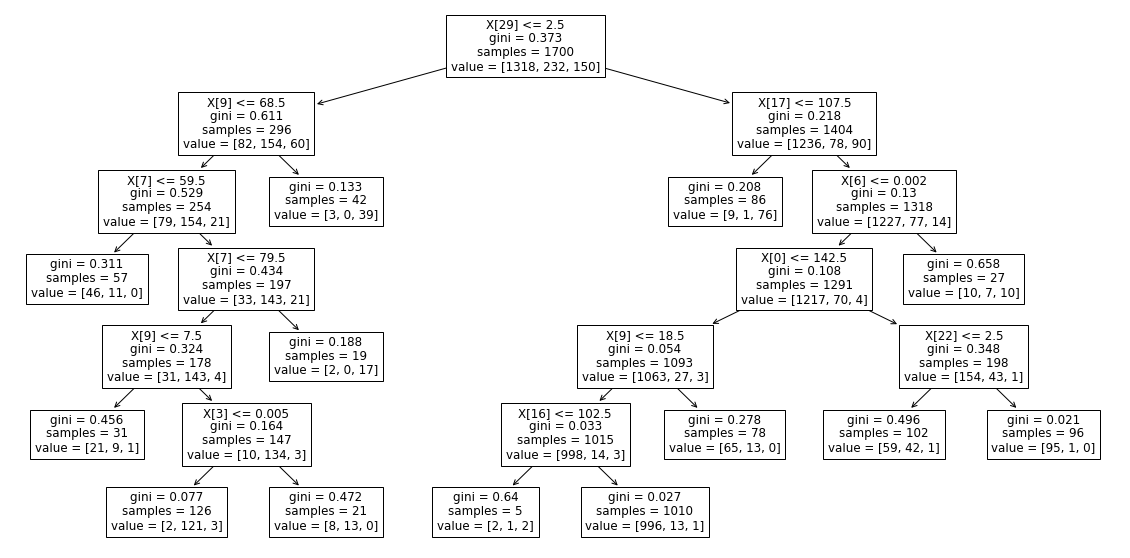

In [96]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt);

# Comparision and observations from visualizing the splits

#### The custom made decision tree using WOE and logistic regression generates rules based on probabilities as thresholds.

#### However, the normal decision tree generates rules using attribute values as thresholds

#### This is evident from the visualizations provided above

# Q3:

## Model using 5 fold Cross validation

In [97]:
from sklearn.model_selection import cross_val_predict
y_pred_cv=cross_val_predict(dt,X,Y,cv=5)

#print the accuracy score
accuracy_score(Y, y_pred_cv)

# Print the classification report containing precision, recall, f1-score, support
print(metrics.classification_report(Y, y_pred_cv))

# You can't use roc_auc as a single summary metric for multiclass models.
# print(roc_auc_score(Y, y_pred_cv))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92      1655
           2       0.65      0.61      0.63       295
           3       0.84      0.61      0.71       176

    accuracy                           0.86      2126
   macro avg       0.80      0.72      0.75      2126
weighted avg       0.86      0.86      0.86      2126



## Student t test for single attribute 

In [98]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=Y_test, b=Y_pred1, equal_var=True)

Ttest_indResult(statistic=array([-43.85251182]), pvalue=array([1.83173296e-220]))

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of given class labels is equal to the mean of the predicted class labels)

HA => µ1 ≠µ2 (population mean of given class labels is different from the mean of the predicted class labels)

Here, since the p-value (1.83173296e-220) is less than alpha = 0.05 so we reject the null hypothesis (H0) of the test.

## Student t test for two attributes 

In [99]:
import scipy.stats as stats
 
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=Y_test, b=Y_pred2, equal_var=True)

Ttest_indResult(statistic=array([-43.85251182]), pvalue=array([1.83173296e-220]))

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of given class labels is equal to the mean of the predicted class labels)

HA => µ1 ≠µ2 (population mean of given class labels is different from the mean of the predicted class labels)

Here, since the p-value (1.83173296e-220) is less than alpha = 0.05 so we reject the null hypothesis (H0) of the test.

In [100]:
# Since the accuracy of both the models is similar ,the possible reason for this may be that when we are taking two 
# attributes for making the model both of them are possibly correlated with each other.

#Hence, the presence of two attributes per node versus one attribute per node both are generating similar results in terms
# of precision, recall, F1 score and accuracy .